In [36]:
%load_ext autotime


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import seaborn as sns

from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight


import numpy as np
import pandas as pd





The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.9 ms


In [1]:
import numpy as np
import pandas as pd


data = pd.read_csv('ai-fall20/datasets/predict-future-sales/sales_train.csv'

# Manipulate Train Data
from dateutil.parser import parse
data.date = data.date.astype('str')
data.date = data.date.apply(lambda x: parse(x))
data.date = data.date.apply(lambda x: pd.to_datetime(x,
    format='%Y-%m-%dT',
    errors='coerce'))
data['month'] = data.date.dt.month
data = smalldf.groupby(['item_id','shop_id','date_block_num'], as_index=False).agg({'item_price':'sum', "item_cnt_day":'sum','month':'first'})

data = data.reset_index()

tree = pd.read_csv('ai-fall20/datasets/predict-future-sales/items.csv')
tree = tree.drop('item_name', axis=1)

# Gist - SAVE!!! for now the only way I know how to create a dictionary with two columns
# to map to a dataframe
branch = tree.set_index('item_id').T.to_dict('records')[0]
data['categories'] = data['item_id'].map(branch)


# Manipulate Test Data
test = pd.read_csv('ai-fall20/datasets/predict-future-sales/test.csv')
test = test.assign(date_block_num = 34)
test  = test.assign(month = 11)
test['categories'] = test['item_id'].map(branch)


#WriteOut to csv
data.to_csv("Train_mod.csv", index=False)
test.to_csv("Test_mod.csv", index=False)

NameError: name 'pd' is not defined

In [33]:
catdf = pd.read_csv('ai-fall20/datasets/predict-future-sales/item_categories_translated.csv')
shopdf = pd.read_csv('ai-fall20/datasets/predict-future-sales/shops_translate.csv')
df =pd.read_csv('ai-fall20/datasets/predict-future-sales/Train_mod.csv', nrows=1500)

df.head(20)


,date_block_num,item_id,shop_id,item_cnt_day
0,0,19,25,1.0
1,0,27,1,1.0
2,0,27,2,1.0
3,0,27,10,1.0
4,0,27,19,1.0
5,0,27,26,1.0
6,0,27,31,1.0
7,0,27,45,1.0
8,0,28,15,1.0
9,0,28,31,3.0


time: 37.3 ms


In [105]:
train = pd.read_parquet('ai-fall20/datasets/predict-future-sales/train_mod.parquet', engine='pyarrow')

time: 104 ms


In [106]:
test = pd.read_parquet('ai-fall20/datasets/predict-future-sales/test_mod.parquet', engine='pyarrow')

time: 22.3 ms


In [108]:
test.head()

,ID,shop_id,item_id,date_block_num,month,categories
0,0,5,5037,34,11,19
1,1,5,5320,34,11,55
2,2,5,5233,34,11,19
3,3,5,5232,34,11,23
4,4,5,5268,34,11,20


time: 6.46 ms


In [72]:
test = smalldf.groupby(['item_id','shop_id','date_block_num'], as_index=False).agg({'item_price':'sum', "item_cnt_day":'sum','month':'first'})

time: 13.7 ms


In [96]:
tree = pd.read_csv('ai-fall20/datasets/predict-future-sales/items.csv')
tree = tree.drop('item_name', axis=1)
branch = tree.set_index('item_id').T.to_dict('records')[0]
smalldf['categories'] = smalldf['item_id'].map(branch)


time: 1.35 s


In [79]:
test.shape
smalldf.shape

(500, 6)

time: 3.38 ms


In [80]:
test.head()

,item_id,shop_id,date_block_num,item_price,item_cnt_day
0,1205,25,0,1499.0,1.0
1,1249,25,0,897.0,4.0
2,1261,25,0,399.0,1.0
3,1266,25,0,299.0,1.0
4,1268,25,0,299.0,1.0


time: 8.66 ms


In [51]:
dfnew.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,NaN,NaN,25,2552,NaN,617.0
1,NaN,NaN,59,22154,NaN,1.0


time: 8.08 ms


In [40]:
from dateutil.parser import parse

smalldf.date = smalldf.date.astype('str')
smalldf.date = smalldf.date.apply(lambda x: parse(x))
smalldf.date = smalldf.date.apply(lambda x: pd.to_datetime(x,
    format='%Y-%m-%dT',
    errors='coerce'))
smalldf['month'] = smalldf.date.dt.month
print(smalldf)

smalldf = smalldf.groupby(['date_block_num','item_id','shop_id','month'])['item_cnt_day'].sum()
print(len(data))

print(data.size)


          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   2013-02-01               0       59    22154      999.00           1.0   
1   2013-03-01               0       25     2552      899.00           1.0   
2   2013-05-01               0       25     2552      899.00          -1.0   
3   2013-06-01               0       25     2554     1709.05           1.0   
4   2013-01-15               0       25     2555     1099.00           1.0   
..         ...             ...      ...      ...         ...           ...   
495 2013-01-27               0       25     1249      299.00           1.0   
496 2013-01-20               0       25     1302      299.00           1.0   
497 2013-01-26               0       25     1249      299.00           2.0   
498 2013-01-18               0       25     1249      299.00           1.0   
499 2013-01-26               0       25     1205     1499.00           1.0   

     month  
0        2  
1        3  
2        5  
3        6 

In [143]:
 from dateutil.parser import parse

 smalldf.date = smalldf.date.astype('str')
 smalldf.date = smalldf.date.apply(lambda x: parse(x))
 smalldf.date = smalldf.date.apply(lambda x: pd.to_datetime(x,
    format='%Y-%m-%dT',
    errors='coerce'))

smalldf['month'] = smalldf.date.dt.month



time: 33.1 ms


In [152]:
from dateutil.parser import parse

data.date = data.date.astype('str')
data.date = data.date.apply(lambda x: parse(x))
data.date = data.date.apply(lambda x: pd.to_datetime(x,
    format='%Y-%m-%dT',
    errors='coerce'))

data['month'] = smalldf.date.dt.month


time: 1min 49s


In [125]:
testcomp = pd.read_csv('ai-fall20/datasets/predict-future-sales/test.csv')
testcomp.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


time: 59.6 ms


In [ ]:
data.head(10)

In [147]:
testcomp = testcomp.assign(date_block_num = 34)
testcomp = testcomp.assign(month = 11)


,ID,shop_id,item_id,date_block_num,month
0,0,5,5037,34,11
1,1,5,5320,34,11
2,2,5,5233,34,11
3,3,5,5232,34,11
4,4,5,5268,34,11
...,...,...,...,...,...
214195,214195,45,18454,34,11
214196,214196,45,16188,34,11
214197,214197,45,15757,34,11
214198,214198,45,19648,34,11


time: 24.1 ms


In [150]:
testcomp.isna().sum()
testcomp.info()
testcomp.item_id.is_unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ID              214200 non-null  int64
 1   shop_id         214200 non-null  int64
 2   item_id         214200 non-null  int64
 3   date_block_num  214200 non-null  int64
 4   month           214200 non-null  int64
dtypes: int64(5)
memory usage: 8.2 MB


False

time: 15.1 ms


In [146]:
testcomp.assign(month = 11)

,ID,shop_id,item_id,month
0,0,5,5037,11
1,1,5,5320,11
2,2,5,5233,11
3,3,5,5232,11
4,4,5,5268,11
...,...,...,...,...
214195,214195,45,18454,11
214196,214196,45,16188,11
214197,214197,45,15757,11
214198,214198,45,19648,11


time: 12.2 ms


In [ ]:

smalldf = smalldf.sort_index()
test = smalldf.groupby(['date_block_num','item_id','shop_id'])['newframe'].sum()
test = test.reset_index()

KeyError: 'Column not found: newframe'

In [132]:
test.head

,shop_id,item_id
0,2,56198933
1,3,56198933
2,4,56198933
3,5,56198933
4,6,56198933
5,7,56198933
6,10,56198933
7,12,56198933
8,14,56198933
9,15,56198933


time: 6.74 ms


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_block_num  500 non-null    int64  
 1   item_id         500 non-null    int64  
 2   shop_id         500 non-null    int64  
 3   item_cnt_day    500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB
None
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:993: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  support, fill_from, density, **artist_kws
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:146: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist_kws, fill, element, multiple, color, alpha


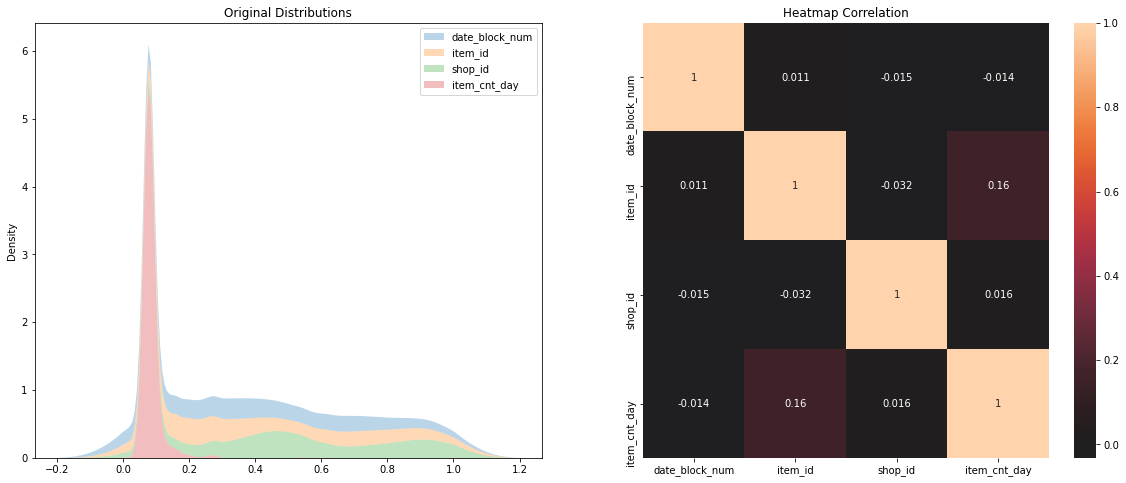

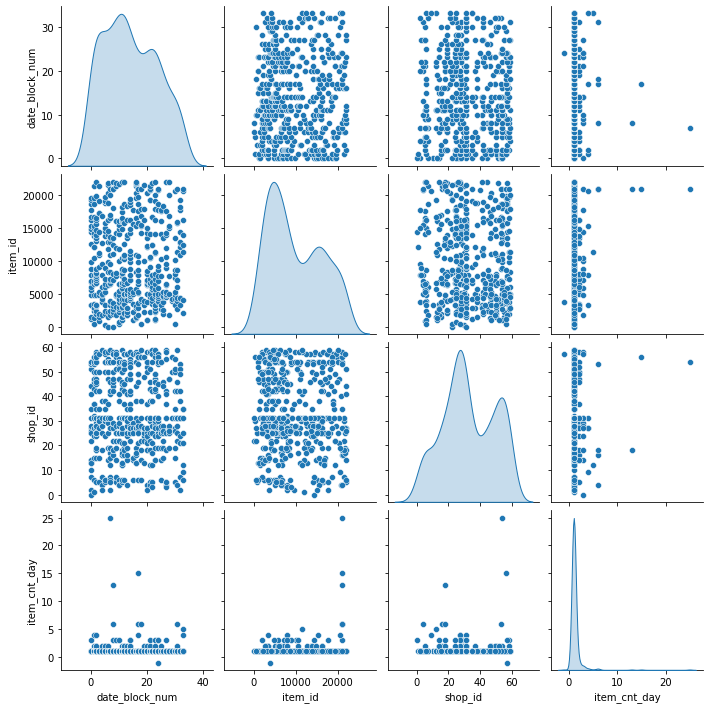

time: 3.68 s


In [47]:

test.isna().sum()
buildgraph(test)



In [139]:

smalldf = smalldf.sort_index()
test = smalldf.groupby(['date_block_num','item_id','shop_id','month'])['item_cnt_day'].sum()
test = test.reset_index()


time: 7.92 ms


In [140]:
test

,date_block_num,item_id,shop_id,item_cnt_day
0,0,32,45,1.0
1,0,98,28,2.0
2,0,478,23,1.0
3,0,1911,28,1.0
4,0,3124,30,1.0
...,...,...,...,...
495,33,13246,31,2.0
496,33,14575,31,1.0
497,33,15238,31,1.0
498,33,16117,25,1.0


time: 10.8 ms


In [49]:
X = test.drop('item_cnt_day')
y = test.item_cnt_day

KeyError: "['item_cnt_day'] not found in axis"

time: 11.2 ms


In [40]:
test

,date_block_num,item_id,shop_id,item_cnt_day
0,0_total,687_total,25_total,1.0
1,0_total,977_total,31_total,1.0
2,0_total,1249_total,31_total,1.0
3,0_total,1410_total,24_total,1.0
4,0_total,1472_total,3_total,1.0
...,...,...,...,...
495,33_total,5037_total,57_total,1.0
496,33_total,7583_total,25_total,1.0
497,33_total,14396_total,42_total,1.0
498,33_total,19144_total,57_total,1.0


time: 14.2 ms


In [61]:
def dropAndSplit(df, predicty, test_size, random_state):
    
    df = df.select_dtypes(include=['int64','float64'], exclude=['object'])
    

    X = df.drop(columns=[predicty], axis=1)
    y = df[predicty]
    
    #generic split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = random_state)
    
    #saves datasets into returnable list
    splitData = [X_train, X_test, y_train, y_test]

    return splitData


time: 1.42 ms


In [62]:
X_train, X_test, y_train, y_test = dropAndSplit(test, 'item_cnt_day', 0.20, 0)

time: 7.42 ms


In [92]:
minmax = StandardScaler()

time: 793 µs


In [64]:
y_test


90     1.0
254    1.0
283    1.0
445    1.0
461    1.0
      ... 
372    1.0
56     1.0
440    1.0
60     1.0
208    1.0
Name: item_cnt_day, Length: 100, dtype: float64

time: 4.06 ms


In [90]:
def collectNames(dataframe):
        columns = list(dataframe.columns)
        return columns 
       

def collectgraph(dataframe, columns):
    
    #future feature - ask for a Y variable to drop

    #necessary Packages 
    import matplotlib.pyplot as plt 
    import seaborn as sns
    
    #Scaling is needed correctly show all variables distribution at the same time -> Scaling prep
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    scaler = StandardScaler()
    minmax = MinMaxScaler()


    tempdf = dataframe.select_dtypes(include=['int64','float64'], exclude=['object'])
    o_length = len(columns)
    new_length = len(list(tempdf.columns))
    dropped_columns = o_length - new_length

    #start one map before scaling

    fig, (ax1) = plt.subplots(ncols=2 , figsize=(20, 8))
   
    

    #scale data
    tempdf = pd.DataFrame(minmax.fit_transform(tempdf),index=tempdf.index, columns=tempdf.columns)

    #warn of dropped columns
    if (dropped_columns > 0):
        print(dropped_columns,"columns were dropped")
        print("try to convert the dropped columns")

    #Print preliminary info of original data frame
    print(dataframe.info())
   
    #graphing
   
    ax1[0].set_title('Original Distributions')
    ax1[1].set_title('Heatmap Correlation')
    
    ds_map = sns.kdeplot(data = tempdf,ax=ax1[0], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
    ns_heatmap = sns.heatmap(tempdf.corr(),ax=ax1[1], annot=True, center=0);
    pp_map = sns.pairplot(dataframe, diag_kind='kde',hue=None)

   
    ds_map
    ns_heatmap
    pp_map

    
def buildgraph(dataframe):
    columns = collectNames(dataframe)
    collectgraph(dataframe, columns)

time: 4.25 ms


In [85]:
def pickScaler(train, test, x):
    # for now choose a number
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer

    scale  = [
    StandardScaler(),
    MinMaxScaler(),
    Normalizer(),
    MaxAbsScaler,
    RobustScaler(),
    QuantileTransformer(),
    PowerTransformer
    ]
    col = train.columns
    
    #necessary Packages 
    import matplotlib.pyplot as plt 
    import seaborn as sns
    
    #set map location , two side by side
    fig, (ax1) = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

    # ax2[0].set_title('Original Testing')
    # ax2[1].set_title('Original Training')
    # ax2[2].set_title('Scaled Training')
    # ax2[3].set_title('Scaled Testing')
    
    ds_map0 = sns.kdeplot(data = X_test, ax=ax1[0], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
   
    ds_map1 = sns.kdeplot(data = X_train,ax=ax1[1], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
    
    #scale data
    scaler = scale[x]
    train = scaler.fit_transform(train)
    test =  scaler.transform(test)
    
    tempX_train_df = pd.DataFrame(scaler.fit_transform(X_train), columns=col)
    tempX_test_df = pd.DataFrame(scaler.transform(X_test),columns=col)


  
    
    ds_map2 = sns.kdeplot(data = tempX_train_df ,ax=ax1[2], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
   
    ds_map3 = sns.kdeplot(data = tempX_test_df, ax=ax1[3], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
   
    ds_map0
    ds_map1
    ds_map2
    ds_map4







time: 3.27 ms


In [89]:
scaler = MinMaxScaler()

NameError: name 'MinMaxScaler' is not defined

In [96]:


X_train = minmax.fit_transform(X_train)
X_test =  minmax.transform(X_test)

time: 8.41 ms


In [98]:
for kernel in ('sigmoid','poly','rbf', 'linear'):
        svclassifier = SVC(kernel=kernel)
        sv = svclassifier.fit(X_train, y_train)
        # print(sv.score(X_train, y_train))
        y_prediction = svclassifier.predict(X_test)
      
        print(accuracy_score(y_test, y_prediction))

        
      

       


0.91
0.91
0.91
0.91
time: 28.3 ms


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=5)

y = y_train
y = y.values.ravel()
grid.fit(X_train, y)

In [101]:
def QuickScores():

    for kernel in ('sigmoid','poly','rbf', 'linear'):
        print("Support Vector Machine ", kernel)
        svclassifier = SVC(kernel=kernel)
        sv = svclassifier.fit(X_train, y_train)
        
        print(svclassifier.score(X_test, y_test))
        print(" ")

      

    print("Logistic Regression")
    lor = LogisticRegression()
    lor.fit(X_train,y_train)
    print(lor.score(X_test, y_test))
    print(" ")           

   

    print('RandomForestClassifier')
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    print(rf.score(X_test, y_test))
    print(" ")
    


    print('KNeighborsClassifier')
    kn = KNeighborsClassifier()
    kn.fit(X_train, y_train)
    print(kn.score(X_test, y_test))
    print(" ")



    print('Gaussian Naive Bayes')
    gb = GaussianNB()
    gb.fit(X_train, y_train)
    print(gb.score(X_test, y_test))
    print(" ")


    print('Gradient Boosting Classifier')
    gbc = GradientBoostingClassifier(random_state=0)
    gbc.fit(X_train, y_train)
    print(gbc.score(X_test, y_test))
    print(" ")

    print('Gradient Boosting Regression')
    gbr = GradientBoostingRegressor(random_state=0)
    gbr.fit(X_train,y_train)
    print(gbr.score(X_test, y_test))


   




time: 2.74 ms


In [102]:
QuickScores()  

Support Vector Machine  sigmoid
0.91
 
Support Vector Machine  poly
0.91
 
Support Vector Machine  rbf
0.91
 
Support Vector Machine  linear
0.91
 
Logistic Regression
0.91
 
Linear Regression
0.013772445047428472
 
RandomForestClassifier
0.91
 
KNeighborsClassifier
0.91
 
Gaussian Naive Bayes
0.92
 
Gradient Boosting Classifier
0.92
 
Gradient Boosting Regression
0.42955978135432005
time: 864 ms


In [104]:
def moreinfo(x):
    try:
        print(classification_report(y_test,y_prediction))
    except:
        print("can't do it")
    
    print(x)
    accScoreTest = accuracy_score(y_train,x.predict(X_train))
    accScoreTrain = accuracy_score(y_test,x.predict(X_test))
    print("Training accuracy =",accScoreTest)
    print("Validation accuracy =",accScoreTrain)
    check = (accScoreTest/accScoreTrain)
    if (check > 1.1):
        print ('Warning!! Value suggests')
        print('overfitting -->',check)
    elif (check < 0.9):
        print("Warning!!!! Value suggests")
        print('underfitting --->', check)
    else:
        print('Everything looks okay')
        print('proceeed to explore further ---> ',check)           
    print(" ")
    print(" ")
        
        
    cm = confusion_matrix(y_test, y_prediction) 
    cm_display = ConfusionMatrixDisplay(cm).plot()

time: 1.23 ms


/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

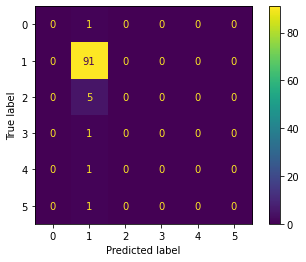

time: 459 ms


In [105]:
lor = LogisticRegression()
lor.fit(X_train,y_train)
y_prediction = lor.predict(X_test)
moreinfo(lor)



In [106]:
 print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test, y_test))
print(" ")   
moreinfo(lr)


Linear Regression
0.013772445047428472
 
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         1
         1.0       0.91      1.00      0.95        91
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         1

    accuracy                           0.91       100
   macro avg       0.15      0.17      0.16       100
weighted avg       0.83      0.91      0.87       100

LinearRegression()
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packag

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

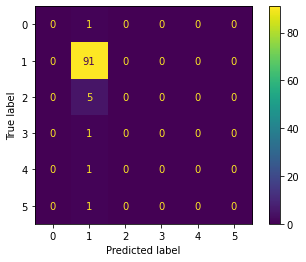

time: 621 ms


In [107]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_prediction = rf.predict(X_test)
moreinfo(rf)


/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

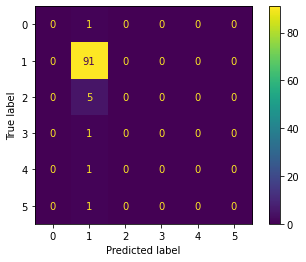

time: 509 ms


In [108]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_prediction = kn.predict(X_test)
moreinfo(kn)



/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

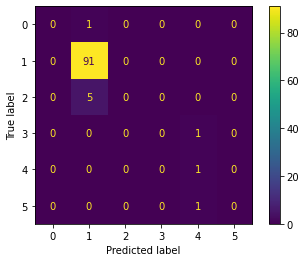

time: 438 ms


In [109]:
gb = GaussianNB()
gb.fit(X_train, y_train)
y_prediction = gb.predict(X_test)
moreinfo(gb)

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


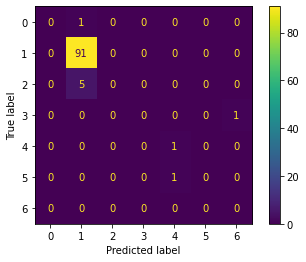

time: 1.14 s


In [110]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_prediction = gbc.predict(X_test)
moreinfo(gbc)

In [111]:
# this cell is 

pca = PCA(n_components=8)
pca.fit(X_train, y_train)
print(pca.score(X, y))

y_prediction = pca.predict(X2)
y_prediction

ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


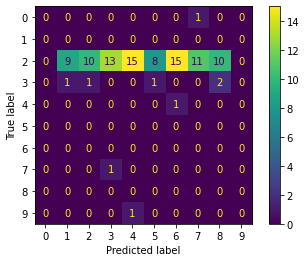

time: 1.48 s


In [112]:
kms = KMeans()
kms.fit(X_train, y_train)
y_prediction = kms.predict(X_test)
moreinfo(kms)



## XGBOOST!!!

In [114]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV,RandomizedSearchCV


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

#the parameters can be built from the testing that goes on below
xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=2)


xgb.fit(X_train, y_train)
y_prediction = xgb.predict(X_test)


scores = cross_val_score(xgb, X,y, cv=kfold)
print('Accuracy:', np.round(scores, 2))
print('Acurracy mean: %0.2f' % (scores.mean()))





NameError: name 'X' is not defined

### This function along with Kfold will help fine tune parameters

In [102]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV,RandomizedSearchCV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)



def grid_search(params, random=False): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1)
    else:
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)

    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print("Best params:", best_params)
    best_score = grid.best_score_
    print("Training score: {:.3f}".format(best_score))


time: 1.29 ms


### start fine tuning

In [76]:
grid_search(params={'n_estimators':[100,200,400,800]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'n_estimators': 100}
Training score: 0.805
time: 16min 41s


In [77]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'learning_rate': 0.05}
Training score: 0.816
time: 8min 35s


In [78]:
grid_search(params={'max_depth':[2, 3, 5, 6, 8]})

Best params: {'max_depth': 2}
Training score: 0.829
time: 4min 47s
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [79]:
grid_search(params={'gamma':[0, 0.1, 0.5, 1, 2, 5]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'gamma': 2}
Training score: 0.827
time: 7min 31s


In [80]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'min_child_weight': 4}
Training score: 0.816
time: 5min 31s


In [81]:
grid_search(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'subsample': 0.7}
Training score: 0.810
time: 5min 52s


In [82]:
grid_search(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'colsample_bytree': 0.8}
Training score: 0.812
time: 5min 54s


In [95]:
model = XGBClassifier(booster='gbtree', label_encoder=False, objective='binary:logistic', random_state=2, n_estimators=5000)
eval_set = [(X_test, y_test)]
eval_metric='error'
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, early_stopping_rounds=100)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(model.get_booster().best_iteration)

[0]	validation_0-error:0.18994
[1]	validation_0-error:0.18436
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[2]	validation_0-error:0.17318
[3]	validation_0-error:0.17318
[4]	validation_0-error:0.16760
[5]	validation_0-error:0.17877
[6]	validation_0-error:0.17877
[7]	validation_0-error:0.16760
[8]	validation_0-error:0.16760
[9]	validation_0-error:0.16760
[10]	validation_0-error:0.16760
[11]	validation_0-error:0.17318
[12]	validation_0-error:0.17318
[13]	validation_0-error:0.16760
[14]	validation_0-error:0.16760
[15]	validation_0-error:0.16760
[16]	validation_0-error:

In [96]:
grid_search(params={'n_estimators':[2, 25, 50, 75, 100]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'n_estimators': 50}
Training score: 0.815
time: 3min 15s


In [97]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8], 'n_estimators':[2, 50, 100]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'max_depth': 2, 'n_estimators': 50}
Training score: 0.834
time: 9min 49s


In [98]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 'max_depth':[2], 'n_estimators':[50]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50}
Training score: 0.836
time: 1min 29s


In [99]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5], 'max_depth':[2], 'n_estimators':[50]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50}
Training score: 0.834
time: 58.3 s


In [100]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 'max_depth':[2], 'n_estimators':[50]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'max_depth': 2, 'n_estimators': 50, 'subsample': 1}
Training score: 0.834
time: 1min 14s


In [103]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'min_child_weight':[1, 2, 3, 4, 5], 
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1, 2, 3, 4, 5, None], 
                    'n_estimators':[2, 25, 50, 75, 100]},
                    random=True)

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'subsample': 0.6, 'n_estimators': 25, 'min_child_weight': 3, 'max_depth': 1, 'learning_rate': 0.4}
Training score: 0.832
time: 7min 8s


In [104]:
grid_search(params={'colsample_bynode':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 'max_depth':[2], 'n_estimators':[25,50]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'colsample_bylevel': 0.7, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'max_depth': 2, 'n_estimators': 50}
Training score: 0.841
time: 43min 7s


In [105]:
grid_search(params={'gamma':[0, 0.01, 0.05, 0.1, 0.5, 1, 2, 3], 'colsample_bylevel':[0.7], 'colsample_bytree':[0.8], 'colsample_bynode':[1], 'max_depth':[2], 'n_estimators':[50]})

/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Best params: {'colsample_bylevel': 0.7, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 2, 'n_estimators': 50}
Training score: 0.841
time: 1min 43s


## The two cells are necessary 
### The first cell prepares the data and after you input the data in your model the y_prediction varaible is saved
### The second cell creates the CSV to be submitted 

In [216]:
## new split

testdata = pd.read_csv('Collection/titanic_comp/test_clean.csv')
traindata = pd.read_csv('Collection/titanic_comp/Train_clean.csv')


#spit X,y for train
X2 = traindata.drop(columns=['Survived', "Unnamed: 0"], axis=1)
y_train = data.Survived
testdata = testdata.drop(columns=['Unnamed: 0'], axis=1)



#Scale
newscaler = StandardScaler()
X_train = newscaler.fit_transform(X2)
X_test = newscaler.transform(testdata)



time: 43.2 ms


In [218]:
#buildsubmission

test_passenger_df = pd.read_csv('Collection/titanic_comp/test.csv')
tree = test_passenger_df.PassengerId

submission = pd.DataFrame()
submission['PassengerID'] = tree.tolist()
submission['Survived'] = y_prediction.tolist()

submission.head()
submission.to_csv("Collection/titanic_comp/Stack2-submission.csv", index=False)


time: 170 ms


In [128]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

#the parameters can be built from the testing that goes on below
xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=2, min_child_weight=3,subsample=0.6, learning_rate=0.2, n_estimators=50, random_state=2, n_jobs=-1,colsample_bylevel = 0.7, colsample_bynode =1, colsample_bytree = 0.8, verbosity=0, gamma=0)


xgb.fit(X_train, y_train)
y_prediction = xgb.predict(X_test)


scores = cross_val_score(xgb, X,y, cv=kfold)
print(y_prediction)

print('Accuracy:', np.round(scores, 2))
print('Acurracy mean: %0.2f' % (scores.mean()))




/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/si

### Voting 

HARD SCORE
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial',
                                                 random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc', SVC(gamma='auto', probability=True)),
                             ('kn', KNeighborsClassifier()),
                             ('gbc', GradientBoostingClassifier()),
                             ('gnb', GaussianNB()),
                             ('xg',
                              XGBClassifier(base_sc

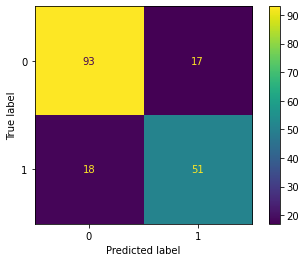

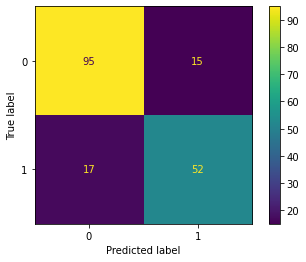

time: 8.38 s


In [192]:
from sklearn.ensemble import VotingClassifier


estimator = []
estimator.append(('lr', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 200, random_state=1)))
estimator.append (('rf',RandomForestClassifier(random_state=1)))
estimator.append(('svc',SVC(kernel='rbf', gamma = 'auto', probability= True)))
estimator.append(('kn', KNeighborsClassifier()))
estimator.append(('gbc',GradientBoostingClassifier()))
estimator.append(('gnb',GaussianNB()))
estimator.append(('xg', XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=2, min_child_weight=3,subsample=0.6, learning_rate=0.2, n_estimators=50, random_state=2, n_jobs=-1,colsample_bylevel = 0.7, colsample_bynode =1, colsample_bytree = 0.8, verbosity=0, gamma=0)))

vc_hard = VotingClassifier(estimators=estimator, voting='hard',n_jobs=-1, verbose=True, weights=[1,2,2,2,2,1,3] )
vc_hard.fit(X_train,y_train)
vc_hard.score(X_test,y_test)
print('HARD SCORE')
y_prediction = vc_hard.predict(X_test)
moreinfo(vc_hard)

vc_soft = VotingClassifier(estimators=estimator, voting='soft', n_jobs=-1, verbose=True, weights=[1, 3, 2, 1, 2, 1, 2])
vc_soft.fit(X_train,y_train)
vc_soft.score(X_test,y_test)
print('SOFT SCORE')
y_prediction = vc_soft.predict(X_test)
moreinfo(vc_soft)








In [ ]:
from sklearn.ensemble import VotingClassifier


estimator = []
estimator.append(('lr', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 200, random_state=1)))
estimator.append (('rf',RandomForestClassifier(random_state=1)))
estimator.append(('svc',SVC(kernel='rbf', gamma = 'auto', probability= True)))
estimator.append(('kn', KNeighborsClassifier()))
estimator.append(('gbc',GradientBoostingClassifier()))
estimator.append(('gnb',GaussianNB()))
estimator.append(('xg', XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=2, min_child_weight=3,subsample=0.6, learning_rate=0.2, n_estimators=50, random_state=2, n_jobs=-1,colsample_bylevel = 0.7, colsample_bynode =1, colsample_bytree = 0.8, verbosity=0, gamma=0)))


vc_soft = VotingClassifier(estimators=estimator, voting='soft', n_jobs=-1, verbose=True, weights=[1, 3, 2, 1, 2, 1, 2])
vc_soft.fit(X_train,y_train)
vc_soft.score(X_test,y_test)
print('SOFT SCORE')
y_prediction = vc_soft.predict(X_test)
moreinfo(vc_soft)


In [187]:
params = {'weights': b_list}
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=2)
rando = RandomizedSearchCV(vc_soft, params, cv=kfold, n_iter=20, n_jobs=-1)
rando.fit(X_train, y_train)
best_params = rando.best_params_
print("Best params:", best_params)
best_score = rando.best_score_
print(best_score)


Best params: {'weights': [1, 4, 3, 2, 2, 1, 3]}
0.8426966292134831
time: 48.4 s


In [191]:
params = {'weights': b_list}
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=2)
gs = GridSearchCV(vc_soft, param_grid=params, cv=kfold, n_jobs=-1)
gs.fit(X_train, y_train)
best_params = gs.best_params_
print("Best params:", best_params)
best_score = gs.best_score_
print(best_score)


Best params: {'weights': [1, 3, 2, 1, 2, 1, 2]}
0.8441011235955056
time: 36min 35s


In [183]:
# build a list 


b_list = list()
for a in range(1,3):
    for b in range(1,5):
        for c in range(1,4):
            for d in range(1,5):
                for e in range(1,4):
                    for f in range(1,3):
                        for g in range(1,6):
                            a_list = [a,b,c,d,e,f,g]
                            b_list.append(a_list)

print(b_list)





2, 2, 2, 4, 1, 1, 2], [2, 2, 2, 4, 1, 1, 3], [2, 2, 2, 4, 1, 1, 4], [2, 2, 2, 4, 1, 1, 5], [2, 2, 2, 4, 1, 2, 1], [2, 2, 2, 4, 1, 2, 2], [2, 2, 2, 4, 1, 2, 3], [2, 2, 2, 4, 1, 2, 4], [2, 2, 2, 4, 1, 2, 5], [2, 2, 2, 4, 2, 1, 1], [2, 2, 2, 4, 2, 1, 2], [2, 2, 2, 4, 2, 1, 3], [2, 2, 2, 4, 2, 1, 4], [2, 2, 2, 4, 2, 1, 5], [2, 2, 2, 4, 2, 2, 1], [2, 2, 2, 4, 2, 2, 2], [2, 2, 2, 4, 2, 2, 3], [2, 2, 2, 4, 2, 2, 4], [2, 2, 2, 4, 2, 2, 5], [2, 2, 2, 4, 3, 1, 1], [2, 2, 2, 4, 3, 1, 2], [2, 2, 2, 4, 3, 1, 3], [2, 2, 2, 4, 3, 1, 4], [2, 2, 2, 4, 3, 1, 5], [2, 2, 2, 4, 3, 2, 1], [2, 2, 2, 4, 3, 2, 2], [2, 2, 2, 4, 3, 2, 3], [2, 2, 2, 4, 3, 2, 4], [2, 2, 2, 4, 3, 2, 5], [2, 2, 3, 1, 1, 1, 1], [2, 2, 3, 1, 1, 1, 2], [2, 2, 3, 1, 1, 1, 3], [2, 2, 3, 1, 1, 1, 4], [2, 2, 3, 1, 1, 1, 5], [2, 2, 3, 1, 1, 2, 1], [2, 2, 3, 1, 1, 2, 2], [2, 2, 3, 1, 1, 2, 3], [2, 2, 3, 1, 1, 2, 4], [2, 2, 3, 1, 1, 2, 5], [2, 2, 3, 1, 2, 1, 1], [2, 2, 3, 1, 2, 1, 2], [2, 2, 3, 1, 2, 1, 3], [2, 2, 3, 1, 2, 1, 4], [2, 2, 3, 1,

### Stacking

>LogisticRegression -> 0.819 (0.044)---Titanic dataset
>KNeighborsClassifier -> 0.811 (0.042)---Titanic dataset
>svm -> 0.832 (0.039)---Titanic dataset
>XGBoost -> 0.823 (0.044)---Titanic dataset
>stacking -> 0.833 (0.040)---Titanic dataset


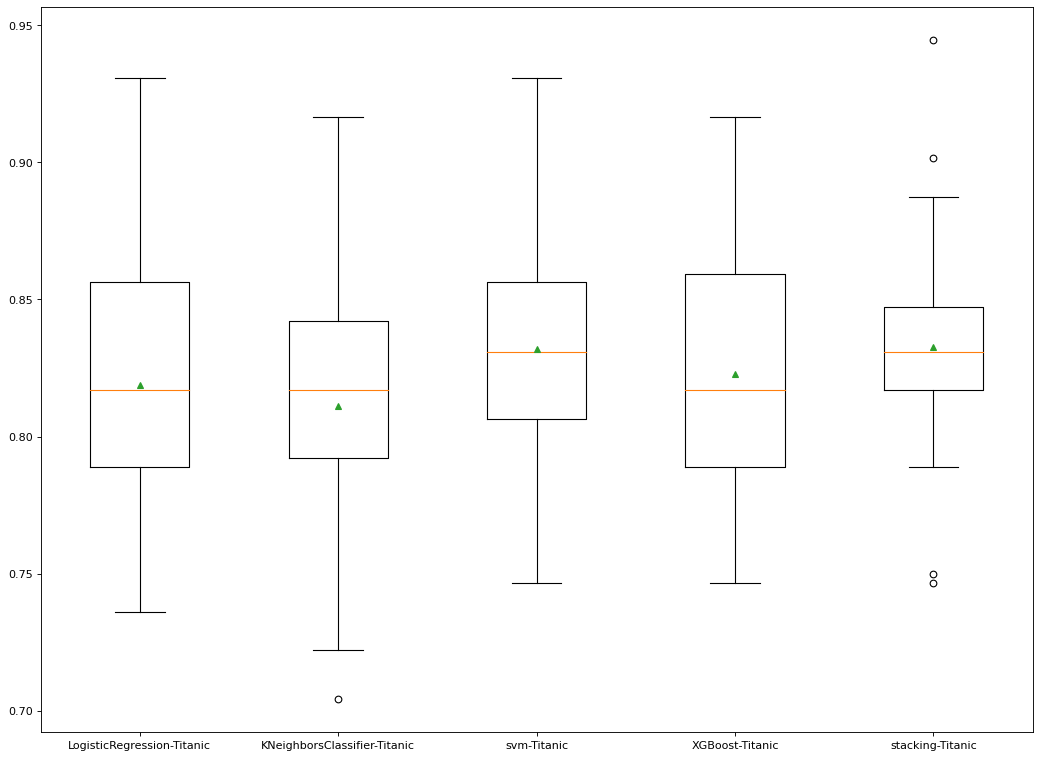

time: 11min 26s


In [215]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn.datasets import load_wine,load_iris
from matplotlib.pyplot import figure
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
 
 
 
# get a stacking ensemble of models
def get_stacking():

  # define the base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
#   level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC(kernel='rbf')))
#   level0.append(('bayes', GaussianNB()))
  level0.append(('xgb', XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=2, min_child_weight=3,subsample=0.6, learning_rate=0.2, n_estimators=50, random_state=2, n_jobs=-1,colsample_bylevel = 0.7, colsample_bynode =1, colsample_bytree = 0.8, verbosity=0, gamma=0)))

  # define meta learner model
  level1 = SVC()
  
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=kfold)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['LogisticRegression'] = LogisticRegression()
  models['KNeighborsClassifier'] = KNeighborsClassifier()
#   models['Decision tree'] = DecisionTreeClassifier()
  models['svm'] = SVC(kernel='rbf')
#   models['GaussianNB'] = GaussianNB()
  models['XGBoost'] = XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=2, min_child_weight=3,subsample=0.6, learning_rate=0.2, n_estimators=50, random_state=2, n_jobs=-1,colsample_bylevel = 0.7, colsample_bynode =1, colsample_bytree = 0.8, verbosity=0, gamma=0)
  models['stacking'] = get_stacking()
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores
 
# get the models to evaluate
models = get_models()


# evaluate the models and store results
results, names, results1 = list(), list(),list()
for name, model in models.items():
  scores= evaluate_model(model)
  results.append(scores)
 
  names.append(name)
  print('>%s -> %.3f (%.3f)---Titanic dataset' % (name, mean(scores), std(scores)))
  
# plot model performance for comparison
pyplot.rcParams["figure.figsize"] = (15,6)
pyplot.boxplot(results, labels=[s+"-Titanic" for s in names], showmeans=True)
pyplot.show()


In [217]:

 
#base 
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
#level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC(kernel='rbf')))
# level0.append(('bayes', GaussianNB()))
level0.append(('xgb', XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=2, min_child_weight=3,subsample=0.6, learning_rate=0.2, n_estimators=50, random_state=2, n_jobs=-1,colsample_bylevel = 0.7, colsample_bynode =1, colsample_bytree = 0.8, verbosity=0, gamma=0)))

#second level
level1 = SVC()


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=kfold) 
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

print(y_prediction)

print('Accuracy:', np.round(scores, 2))
print('Acurracy mean: %0.2f' % (scores.mean()))




/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/si